In [ ]:
import torch
import numpy as np
from torchvision import datasets, transforms

In [ ]:
kwargs = {'num_workers': 4, 'pin_memory': True} \
         if torch.cuda.is_available() else {}

def corner_kernel(factor):
    kernel = np.ones((32, 32))
    limit = int(factor * kernel.shape[0]) * 2
    f = (1 - np.tril(kernel[:limit, :limit]))
    kernel[kernel.shape[0] - limit:limit + kernel.shape[0], :limit] = f
    return torch.tensor(kernel)

In [ ]:
from matplotlib.pyplot import imshow

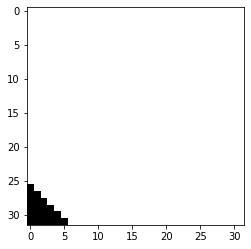

In [ ]:
imshow(corner_kernel(0.1), cmap='gray')

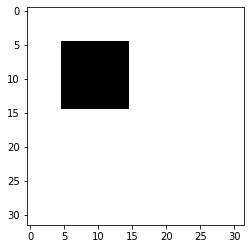

In [ ]:
import random

def single_square_kernel(start=5, size=10):
    kernel = np.ones((32, 32))
    kernel[start:start+size, start:start+size] = 0.
    return torch.tensor(kernel)

def single_square_kernel_random(start=5, size=10):
    random_pos = random.randint(0, 31 - size)
    kernel = np.ones((32, 32))
    kernel[random_pos:random_pos + size, random_pos:random_pos + size] = 0.
    return torch.tensor(kernel)

def multiple_square_kernel(n_cuts=3, start=5, size=10):
    size_triple = size // n_cuts
    kernel = np.ones((32, 32))

    beg = start
    end = start + size_triple

    for _ in range(n_cuts):

        kernel[beg:end, beg:end] = 0.

        beg = end + 5
        end = beg + size_triple

    return torch.tensor(kernel)

def multiple_square_kernel_random(n_cuts = 2, start=0, size=20, sep = 5):
    size_triple = size // n_cuts
    kernel = np.ones((32, 32))

    beg1 = start + random.randint(1, sep)
    end1 = beg1 + size_triple

    beg2 = start + random.randint(1, sep)
    end2 = beg2 + size_triple

    for _ in range(n_cuts):

        kernel[beg1:end1, beg2:end2] = 0.

        beg1 = end1 + random.randint(1, sep)
        end1 = beg1 + size_triple

        beg2 = end2 + random.randint(1, sep)
        end2 = beg2 + size_triple

    return torch.tensor(kernel)

imshow(single_square_kernel(), cmap='gray')


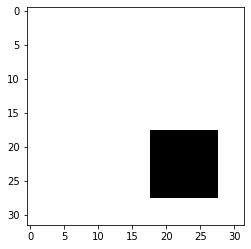

In [ ]:
imshow(single_square_kernel_random(), cmap='gray')

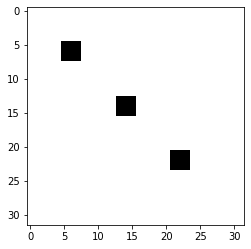

In [ ]:
imshow(multiple_square_kernel(), cmap='gray')

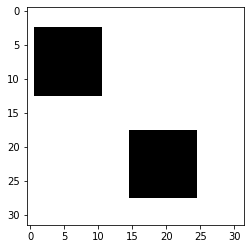

In [ ]:
imshow(multiple_square_kernel_random(), cmap='gray')

In [ ]:
transform_cifar = transforms.Compose(
        [transforms.ToTensor()])

def cifar10_loader(train=False, batch_size=4):
    return torch.utils.data.DataLoader(
        datasets.CIFAR10('../data', download=True, train=train,
                          transform=transform_cifar),
                          batch_size=batch_size,
                          shuffle=train, **kwargs)

In [ ]:
loader = cifar10_loader()

Files already downloaded and verified


In [ ]:
import matplotlib.pyplot as plt
import torchvision
def imshow2(img):
    npimg = img.numpy()
    plt.axis('off')
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


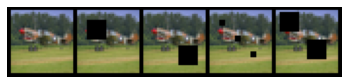

In [ ]:
image0 = loader.dataset[3421][0]

image1 = loader.dataset[3421][0]
filter1 = single_square_kernel()

image2 = loader.dataset[3421][0]
filter2 = single_square_kernel_random()

image3 = loader.dataset[3421][0]
filter3 = multiple_square_kernel()

image4 = loader.dataset[3421][0]
filter4 = multiple_square_kernel_random()

for image, filter in zip([image1, image2, image3, image4], [filter1, filter2, filter3, filter4]):
    for ch in image:
        ch.mul_(filter)

imshow2(torchvision.utils.make_grid([image0, image1, image2, image3, image4]))